## The Mathematics of Gossip
Extending ODE's to a humanistic application

Jessica Deters, Izabel Aguiar, Jacquie Feuerborn

This jupyter notebook is intended to supplement the CODEE Journal Submission. Further details and explanations can be found in the paper. 


## Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Defining the integration scheme

In practice, systems of Ordinary Differential Equations must be _numerically integrated_ to find a solution. Below we define a *fourth-order Runge-Kutta scheme* with which we'll integrate our Gossip Model. Although numerical integration techniques are a vast and interesting topic of study, discussing them is not in the scope of this activity. If you're interested in learning more, ask your professor for resources in your department.

In [51]:
def RK4(fun, y0, times, args=None):
    h = times[1]-times[0]
    y = np.zeros((len(y0), len(times)))
    ly = len(y0)
    y[:, 0] = y0.reshape((ly,))
    for i in range(len(times)-1):
        k1 = h * fun(y[:, i], args)
        k2 = h * fun(y[:, i] + k1/2, args)
        k3 = h * fun(y[:, i] + k2/2, args)
        k4 = h * fun(y[:, i] + k3, args)
        y[:, i+1] = (y[:, i] + k1/6 + k2/3 + k3/3 + k4/6).reshape((ly,))
    return y.T

delta = 0.01

## Defining the system of Ordinary Differential Equations (ODE's)

The system of ODE's describing the dynamics of the Susceptible, Infected, and Recovered (SIR) populations is described by what will hereafter be referred to as "the Gossip model."

\begin{align}
\frac{\partial S}{\partial t} &= - \beta \cdot S \cdot I \\
\frac{\partial I}{\partial t} &= \rho \cdot \beta \cdot S \cdot I - \gamma \cdot I + \alpha \cdot R\\
\frac{\partial R}{\partial t} &= \gamma \cdot I - \alpha \cdot R + (1-\rho) \cdot \beta \cdot S \cdot I
\end{align}

In this model, $S, I$, and $R$ represent the populations of those Susceptible to the rumor, Infected by the rumor, and Recovered from the rumor, respectively. 

In [4]:
def gossip(Y, args):
    beta, gamma, p, alpha = args
    S, I, R = Y
    dYdt = np.array([-beta * S * I,\
                     p * beta * S * I - gamma * I + alpha * R,\
                     gamma * I - alpha * R + (1-p) * beta * S * I])
    return dYdt

## Defining the parameters
The parameters $\beta, \rho, \gamma, \alpha$ represent various characteristics of the rumor and/or rumor spreader.

\begin{align}
\beta:& \,\,\,\, \textrm{the rate at which the rumor is spread}\\
(1-\rho):&\,\,\,\, \textrm{the percentage of the population that rejects the rumor immediately upon hearing it}\\
\gamma:&\,\,\,\, \textrm{the rate at which the Infected reject the rumor}\\
\alpha:&\,\,\,\, \textrm{the rate of persuasion of the Infected on the Recovered}
\end{align}

In the following function definition we define the parameters for the three different gossipers, which will be discussed in more detail in the *Anthropomorphized Sensitivity Analysis* section below. The only required argument for the function is a string containing the gossiper's name. To define your own gossiper, the arguments b, g, p, a must also be provided. Don't worry about this too much for now, as we'll get into it later.

In [48]:
def parameters(gossiper, b=None, g=None, p=None, a=None):
    if gossiper == 'Regina George':
        beta = 0.03
        gamma = 0.02
        p = 0.2
        alpha = 0.
    elif gossiper == 'Dr. Neverheardofher':
        beta = 0.001
        gamma = 0.005
        p = 0.99
        alpha = 0.
    elif gossiper == 'the Conwoman':
        beta = 0.003
        gamma = 0.001
        p = 0.7
        alpha = 0.009
    elif gossiper == 'Test':
        beta = 0.002
        gamma = 0.01
        p = 0.6
        alpha = 0
    else:
        beta = b
        gamma = g
        p = p
        alpha = a
    return beta, gamma, p, alpha

## Initial Conditions and Time

The variables defined in the code below describe the initial conditions for the Gossip Model.

TotalPopulation is the total number of people in the system (e.g., school population, number of people at a party, number of people in a cafe). 

RumorStarters is the number of people starting the rumor (e.g., one gossiper, a group of propagandists, the number of magazines disseminated).

Days is the number of days to carry the simulation through. You'll notice later that some rumors spread faster than others. How long do you want to analyze the system?

In [52]:
TotalPopulation = 1000
RumorStarters = 1
IC = np.array([TotalPopulation-RumorStarters, RumorStarters, 0.])

Days = 31.
times = np.arange(0., Days+delta, delta)


## Integrating the system with test parameters

To see the dynamics of the Gossip Model with test parameters $\beta=0.01, \gamma = 0.01, \rho=0.5, \alpha = 0$, we integrate the system with the Test gossiper. 

What dynamics do you observe with these parameters? Explain in words what you see in the graph.

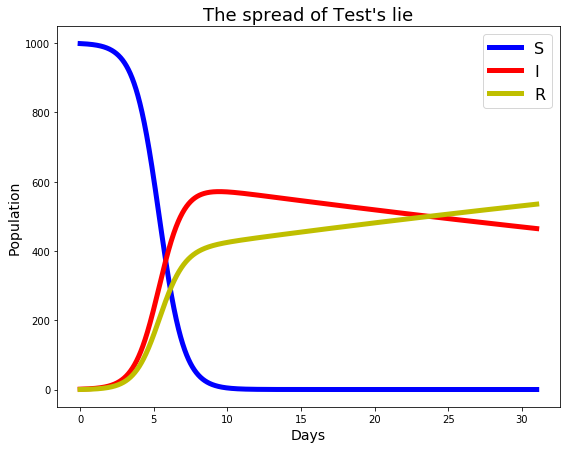

In [53]:
gossiper = 'Test'
Rumor = RK4(gossip, IC, times, parameters(gossiper))

with plt.rc_context({'figure.figsize':(9,7)}):
    plt.plot(times, Rumor[:, 0], lw='5', c = 'b', label= 'S')
    plt.plot(times, Rumor[:, 1], lw='5', c = 'r', label = 'I')
    plt.plot(times, Rumor[:, 2], lw='5', c = 'y', label = 'R')
    leg = plt.legend(loc='upper right',fontsize = 16)
    plt.xlabel('Days', fontsize = 14)
    plt.ylabel('Population', fontsize = 14)
    plt.title('The spread of '+gossiper+'\'s lie', fontsize = 18)
    plt.show()

## Anthropomorphized Sensitivity Analysis

When we create a model to give us information about a physical system, we often conduct _sensitivity analyses_ to understand how different parameter values affect the observed behavior. 

In the Gossip Model, we will observe the different dynamics of the spread of the rumor by creating different gossipers. How does the _source_ of the rumor affect how it infects a community?

We have predefined three different personas to conduct our _anthropomorphized sensitivity analysis_. How does Regina George's rumor differ from Dr. Neverheardofher's lie? What does the $\alpha$ parameter tell us about the Conwoman?

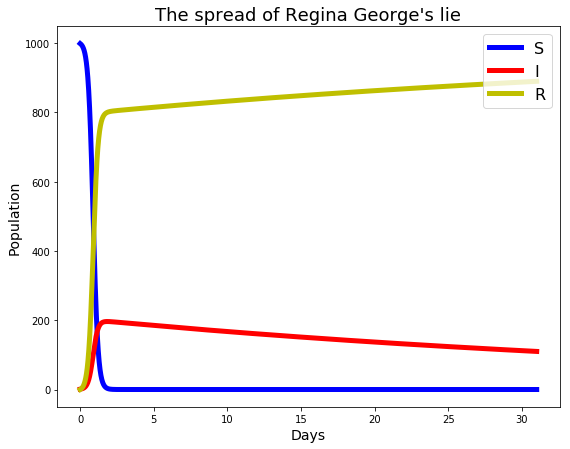

In [54]:
gossiper = 'Regina George'
Rumor = RK4(gossip, IC, times, parameters(gossiper))

with plt.rc_context({'figure.figsize':(9,7)}):
    plt.plot(times, Rumor[:, 0], lw='5', c = 'b', label= 'S')
    plt.plot(times, Rumor[:, 1], lw='5', c = 'r', label = 'I')
    plt.plot(times, Rumor[:, 2], lw='5', c = 'y', label = 'R')
    leg = plt.legend(loc='upper right',fontsize = 16)
    plt.xlabel('Days', fontsize = 14)
    plt.ylabel('Population', fontsize = 14)
    plt.title('The spread of '+gossiper+'\'s lie', fontsize = 18)
    plt.show()

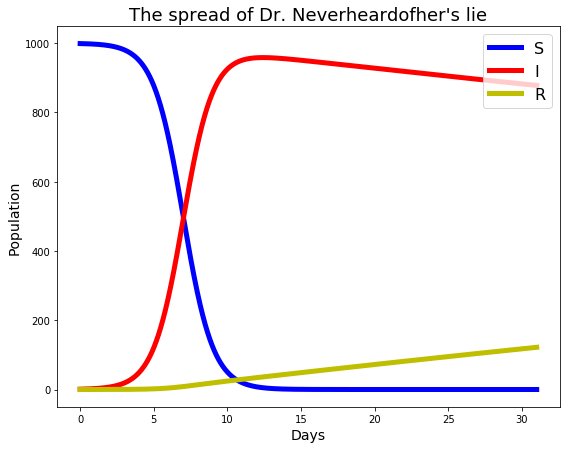

In [46]:
gossiper = 'Dr. Neverheardofher'
Rumor = RK4(gossip, IC, times, parameters(gossiper))

with plt.rc_context({'figure.figsize':(9,7)}):
    plt.plot(times, Rumor[:, 0], lw='5', c = 'b', label= 'S')
    plt.plot(times, Rumor[:, 1], lw='5', c = 'r', label = 'I')
    plt.plot(times, Rumor[:, 2], lw='5', c = 'y', label = 'R')
    leg = plt.legend(loc='upper right',fontsize = 16)
    plt.xlabel('Days', fontsize = 14)
    plt.ylabel('Population', fontsize = 14)
    plt.title('The spread of '+gossiper+'\'s lie', fontsize = 18)
    plt.show()

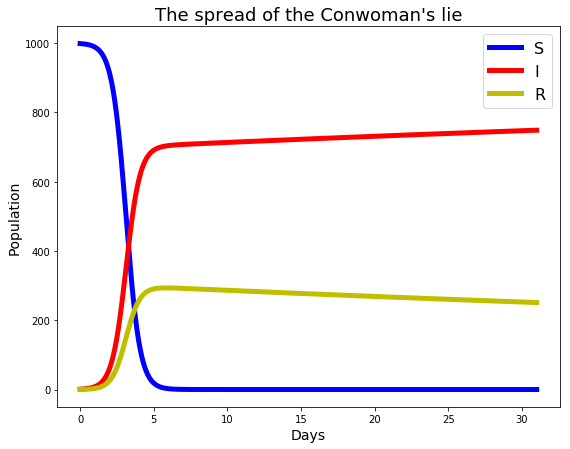

In [49]:
gossiper = 'the Conwoman'
Rumor = RK4(gossip, IC, times, parameters(gossiper))

with plt.rc_context({'figure.figsize':(9,7)}):
    plt.plot(times, Rumor[:, 0], lw='5', c = 'b', label= 'S')
    plt.plot(times, Rumor[:, 1], lw='5', c = 'r', label = 'I')
    plt.plot(times, Rumor[:, 2], lw='5', c = 'y', label = 'R')
    leg = plt.legend(loc='upper right',fontsize = 16)
    plt.xlabel('Days', fontsize = 14)
    plt.ylabel('Population', fontsize = 14)
    plt.title('The spread of '+gossiper+'\'s lie', fontsize = 18)
    plt.show()

## Create your own gossiper

Below, define new values for $\beta, \rho, \gamma,$ and $\alpha$ to create your own gossiper. What do the relative values of these parameters represent in terms of their personality/social standing? 

In [ ]:
#To define a gossiper, uncomment the below lines and define parameters b, p, g, a
gossiper = 'Gossiper Name'
b = ; p = ; g = ; a = ;
Rumor = RK4(gossip, IC, times, parameters(gossiper, b, p, g, a))

with plt.rc_context({'figure.figsize':(9,7)}):
    plt.plot(times, Rumor[:, 0], lw='5', c = 'b', label= 'S')
    plt.plot(times, Rumor[:, 1], lw='5', c = 'r', label = 'I')
    plt.plot(times, Rumor[:, 2], lw='5', c = 'y', label = 'R')
    leg = plt.legend(loc='upper right',fontsize = 16)
    plt.xlabel('Days', fontsize = 14)
    plt.ylabel('Population', fontsize = 14)
    plt.title('The spread of '+gossiper+'\'s lie', fontsize = 18)
    plt.show()

## One step further

How might the initial conditions and parameters change if instead of a gossiper spreading a lie, a group is distributing false propaganda throughout a city? Use the code below to create new scenarios and new gossipers, and describe what you observe and why.

In [ ]:
TotalPopulation = 1000
RumorStarters = 1
Days = 31.

IC = np.array([TotalPopulation-RumorStarters, RumorStarters, 0.])

times = np.arange(0., Days+delta, delta)

gossiper = 'Gossiper Name'
b = ; p = ; g = ; a = ;
Rumor = RK4(gossip, IC, times, parameters(gossiper, b, p, g, a))

with plt.rc_context({'figure.figsize':(9,7)}):
    plt.plot(times, Rumor[:, 0], lw='5', c = 'b', label= 'S')
    plt.plot(times, Rumor[:, 1], lw='5', c = 'r', label = 'I')
    plt.plot(times, Rumor[:, 2], lw='5', c = 'y', label = 'R')
    leg = plt.legend(loc='upper right',fontsize = 16)
    plt.xlabel('Days', fontsize = 14)
    plt.ylabel('Population', fontsize = 14)
    plt.title('The spread of '+gossiper+'\'s lie', fontsize = 18)
    plt.show()

## Reflection

+ How could _data_ make the Gossip Model better? (_think of parameter values_)
+ How _could_ this model be used to help society?
+ In creating the model we assumed that a _lie_ was being spread throughout a community. How does your answer above change if we instead assume that a _truth_ was being spread?
+ What in the model would change if we allowed the Recovered population to persuade the Infected? 
+ Brainstorm different extensions to this model to account for various aspects that have been glossed over? (_think in mathematics, words, or both_)
